In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Quick EDA before modelling
data = pd.read_csv('data/daily-total-female-births.csv')
print(f'Dataframe shape : {data.shape}')
print(f'Data types : {data.dtypes}')
data.head(n=5)

Dataframe shape : (365, 2)
Data types : Date      object
Births     int64
dtype: object


,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [3]:
# Convert 'Date' column to datetime format
import datetime

data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
print(f'New data types : {data.dtypes}')
print(f'First date : {data["Date"].min()}, last date : {data["Date"].max()}')

New data types : Date      datetime64[ns]
Births             int64
dtype: object
First date : 1959-01-01 00:00:00, last date : 1959-12-31 00:00:00


In [4]:
data.isnull().sum()  # No missing data

Date      0
Births    0
dtype: int64

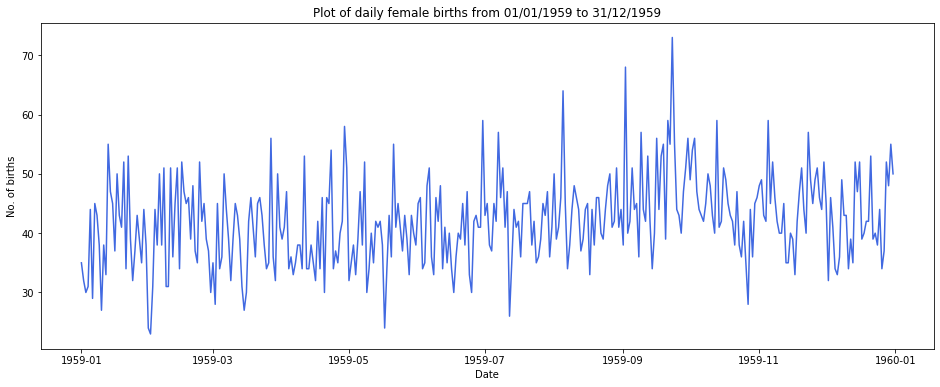

In [5]:
# Visualising trend
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(16,6))
plt.plot(data['Date'], data['Births'], color='royalblue')
plt.title('Plot of daily female births from 01/01/1959 to 31/12/1959')
plt.xlabel('Date')
plt.ylabel('No. of births')
plt.show()

Mean number of births : 41.98, SD : 7.35


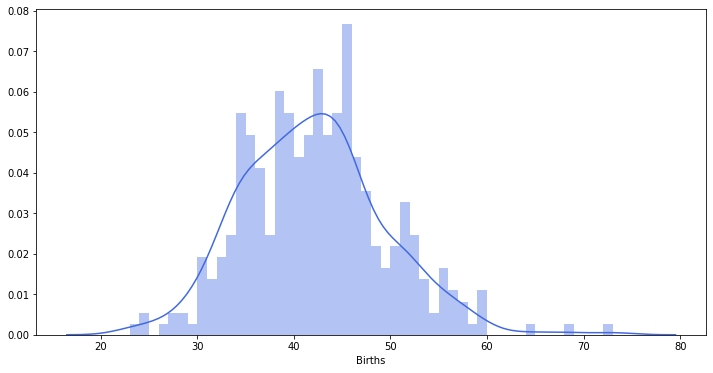

In [6]:
# Getting statistics
mean_births = data['Births'].mean()
sd_births = data['Births'].std()
print(f'Mean number of births : {np.round(mean_births,2)}, SD : {np.round(sd_births, 2)}')

# Plotting distribution of births
import seaborn as sns
plt.figure(figsize=(12,6))
sns.distplot(data['Births'], color='royalblue', bins=50)
plt.show()

In [7]:
# Checking for outliers from graph (although they dont necessarily mean anything)
data[data['Births'] > 60]

,Date,Births
216,1959-08-05,64
244,1959-09-02,68
265,1959-09-23,73


In [8]:
data[data['Births'] < 30]

,Date,Births
5,1959-01-06,29
9,1959-01-10,27
30,1959-01-31,24
31,1959-02-01,23
60,1959-03-02,28
73,1959-03-15,27
136,1959-05-17,24
192,1959-07-12,26
299,1959-10-27,28
